In [1]:
from reservoir import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load sample data

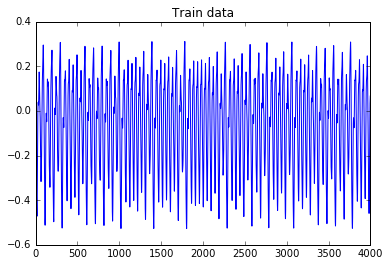

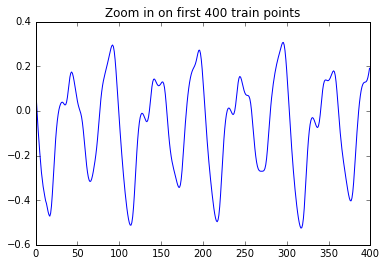

In [2]:
data = np.loadtxt('../Research/MackeyGlass_t17.txt')

train = data[:4000].reshape(-1, 1)
test = data[4000:6000].reshape(-1, 1)
plt.title("Train data")
plt.plot(train)
plt.show()
plt.title("Zoom in on first 400 train points")
plt.plot(train[:400])
plt.show()

### Add noise

Standard deviation of noise is: 0.108095284028


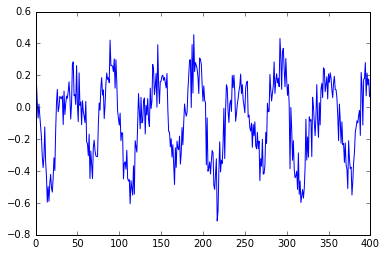

In [3]:
# Define noisy data for Bayesian Optimization
snr = 4
noise_std = np.sqrt(train.std(ddof=1)**2 / snr)

print('Standard deviation of noise is:', noise_std)
noisy_train = train + np.random.normal(0, noise_std, size=train.shape)
noisy_test = test + np.random.normal(0, noise_std, size=test.shape)
plt.plot(noisy_train[:400])
plt.show()

### Set bounds

In [4]:
bounds = [
    {'name': 'input_scaling', 'type': 'continuous', 'domain': (0, 1)},
    {'name': 'feedback_scaling', 'type': 'continuous', 'domain': (0, 1)},
    {'name': 'leaking_rate', 'type': 'continuous', 'domain': (0, 1)}, 
    {'name': 'spectral_radius', 'type': 'continuous', 'domain': (0, 1.25)},
    {'name': 'regularization', 'type': 'continuous', 'domain': (-12, 1)},
    {'name': 'connectivity', 'type': 'continuous', 'domain': (-3, 0)},
    {'name': 'n_nodes', 'type': 'continuous', 'domain': (100, 1500)}
]

### Optimize

In [5]:
%%time
esn_cv = EchoStateNetworkCV(bounds, 1000, batch_size=8, iterations=30, scoring_method='tanh')
best_arguments = esn_cv.optimize(y=noisy_train)
best_arguments

Model initialization and exploration run...
Objective scores: [ 0.08033816]
Objective scores: [ 0.08249014]
Objective scores: [ 1.]
Objective scores: [ 0.05465883]
Objective scores: [ 0.044949]
Objective scores: [ 0.04112519]
Objective scores: [ 0.05343865]
Objective scores: [ 0.08697481]
The set cost function is ignored! LBC acquisition does not make sense with cost.

Name : GP regression
Objective : 11.351508265637381
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  Mat52.variance           |    0.990002484929  |      +ve      |        
  Mat52.lengthscale        |              (7,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00999751466344  |      +ve      |         

Starting optimization...
Objective scores: [ 0.05825017]
Objective scores: [ 0.06066269]
Objective scores: [ 0.04431965]
Objective scores: [ 0.11377234]
Objective scores: [ 0.10501353]
Can

TypeError: 'NoneType' object is not iterable